In [103]:
import numpy as np
import pandas as pd

import seaborn as sns


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6


In [105]:
train = pd.read_csv("data/train_advanced.csv")
test = pd.read_csv("data/test_advanced.csv")
sample = pd.read_csv("data/sample_submission.csv")

# Exploratory Data Analysis

## Date

In [106]:
train.Date=pd.to_datetime(train.Date,format='%m/%d/%Y')
train.Date.dtypes
train.Date.unique()

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', ...,
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [107]:
train['year'] = pd.DatetimeIndex(train['Date']).year
train['month'] = pd.DatetimeIndex(train['Date']).month
train['day'] = pd.DatetimeIndex(train['Date']).day

In [108]:
train = train.set_index(["Date"])
train.head()

,Store,Item,Sales,Average Rating,Location,Category,Branding,year,month,day
Date,,,,,,,,,,
2017-01-01,KMart,1,13,2.8,Wheelers Hill VIC 3170,Electronics,Sony,2017,1,1
2017-01-02,KMart,1,11,1.4,Wheelers Hill VIC 3170,Electronics,Sony,2017,1,2
2017-01-03,KMart,1,14,1.8,Wheelers Hill VIC 3170,Electronics,Sony,2017,1,3
2017-01-04,KMart,1,13,1.3,Wheelers Hill VIC 3170,Electronics,Sony,2017,1,4
2017-01-05,KMart,1,10,2.9,Wheelers Hill VIC 3170,Electronics,Sony,2017,1,5


In [109]:
grouped_items = train.groupby(train.Item)

items = range(1, 51)

dataframes = {}

for item in items:
    dataframes[item] = grouped_items.get_group(item)

dfs = {}

for item in items:
    
    df = dataframes[item]
    
    grouped_location = df.groupby(df.Store)
    
    dfs[item] = {}
    for store in train.Store.unique():
        dfs[item][store] = {"df": grouped_location.get_group(store)}
      
dfs[2]["Coles"]['df']

,Store,Item,Sales,Average Rating,Location,Category,Branding,year,month,day
Date,,,,,,,,,,
2017-01-01,Coles,2,43,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2017,1,1
2017-01-02,Coles,2,27,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2017,1,2
2017-01-03,Coles,2,38,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2017,1,3
2017-01-04,Coles,2,35,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2017,1,4
2017-01-05,Coles,2,47,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2017,1,5
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,Coles,2,79,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2021,6,26
2021-06-27,Coles,2,80,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2021,6,27
2021-06-28,Coles,2,90,3.1,"South Melbourne, VIC 3205",Health & Wellbeing,Swisse,2021,6,28


In [110]:
threshold = 5
table = [[0 for _ in range(51)] for _ in range(51)]

for item1 in range(1, 51):
    for item2 in range(1, 51):
        diff = abs(np.average(dfs[item1]["KMart"]["df"].Sales - dfs[item2]["KMart"]["df"].Sales))
        print(diff)
        table[item1][item2] = diff

grps = {}
for i in range(1,51):
    grps[i] = []
    for j in range(1,51):
        if table[i][j] < threshold:
            grps[i].append(j)

groups = sorted(grps.values())
uniques = []
for i in range(len(groups)-1):
    if groups[i+1] != groups[i]:
        uniques.append(set(groups[i]))

subsets = []
for i in range(len(uniques)):
    set1 = uniques[i]
    for j in range(len(uniques)):
        set2 = uniques[j]
        if set1.issubset(set2) and i!=j:
            subsets.append(set1)

for redundant in subsets:
    uniques.remove(redundant)



0.0
32.44762484774665
12.987819732034104
0.007308160779537149
3.2704019488428746
32.404384896467725
32.17904993909866
48.487819732034104
26.02801461632156
45.33434835566383
42.2442143727162
42.32764920828258
55.06455542021924
32.434226552984164
58.45127892813642
3.2917174177831914
9.82095006090134
55.198538367844094
16.28501827040195
22.506090133982948
15.800243605359318
51.73020706455542
6.283800243605359
39.3258221680877
51.676004872107185
22.739951278928135
0.06090133982947625
58.378197320341044
42.1979293544458
15.915347137637028
32.29902557856273
19.422655298416565
41.859926918392205
3.1967113276492083
38.73081607795371
48.37088915956151
6.244823386114494
52.30816077953715
19.27466504263094
6.33373934226553
0.03532277710109622
12.915956151035322
25.70706455542022
6.365408038976858
51.74604141291108
32.14799025578563
0.2271619975639464
26.013398294762485
6.309378806333739
38.552984165651644
32.44762484774665
0.0
19.459805115712545
32.440316686967115
35.71802679658953
0.043239951278

In [111]:
dfs[3]["KMart"]["df"].Sales - dfs[4]["KMart"]["df"].Sales

Date
2017-01-01     5
2017-01-02    19
2017-01-03     6
2017-01-04    -9
2017-01-05    11
              ..
2021-06-26     1
2021-06-27    12
2021-06-28    22
2021-06-29     3
2021-06-30    16
Name: Sales, Length: 1642, dtype: int64

In [112]:
groups = {}
for i, group in enumerate(uniques):
    data = {}
    for item in list(group):
        data[str(item)] = list(dfs[item]["KMart"]["df"].Sales)

    df = pd.DataFrame(index=dfs[2]["KMart"]["df"].index, data=data)
    groups[i]=df.mean(axis=1)

item_group = {}
final_groups = [[] for _ in range(len(uniques))]
for item in range(1, 51):
    lst = []
    for group in groups:
        lst.append(abs(np.average(dfs[item]["KMart"]["df"].Sales - groups[group])))
    final_groups[np.argmin(lst)].append(item)
    item_group[item] = f"items{np.argmin(lst)}"
        
final_groups

[[1, 4, 5, 27, 41, 47],
 [16, 34],
 [2, 6, 7, 14, 31, 46],
 [3, 42],
 [17],
 [19, 21, 30, 32, 39],
 [10],
 [8, 36],
 [22, 25, 38, 45],
 [9, 20, 26, 43, 48],
 [11, 12, 24, 29, 33, 35, 50],
 [13, 15, 18, 28],
 [23, 37, 40, 44, 49]]

In [113]:
item_group

{1: 'items0',
 2: 'items2',
 3: 'items3',
 4: 'items0',
 5: 'items0',
 6: 'items2',
 7: 'items2',
 8: 'items7',
 9: 'items9',
 10: 'items6',
 11: 'items10',
 12: 'items10',
 13: 'items11',
 14: 'items2',
 15: 'items11',
 16: 'items1',
 17: 'items4',
 18: 'items11',
 19: 'items5',
 20: 'items9',
 21: 'items5',
 22: 'items8',
 23: 'items12',
 24: 'items10',
 25: 'items8',
 26: 'items9',
 27: 'items0',
 28: 'items11',
 29: 'items10',
 30: 'items5',
 31: 'items2',
 32: 'items5',
 33: 'items10',
 34: 'items1',
 35: 'items10',
 36: 'items7',
 37: 'items12',
 38: 'items8',
 39: 'items5',
 40: 'items12',
 41: 'items0',
 42: 'items3',
 43: 'items9',
 44: 'items12',
 45: 'items8',
 46: 'items2',
 47: 'items0',
 48: 'items9',
 49: 'items12',
 50: 'items10'}

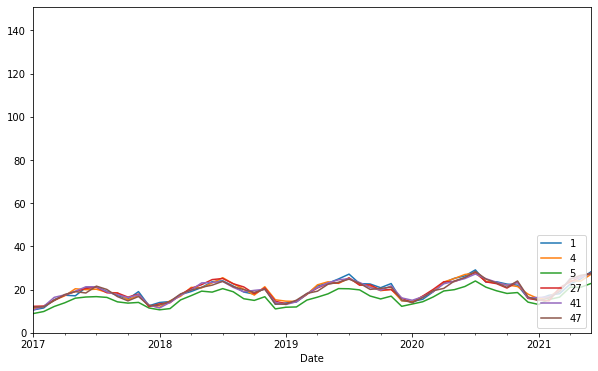

In [114]:
for i in final_groups[0]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

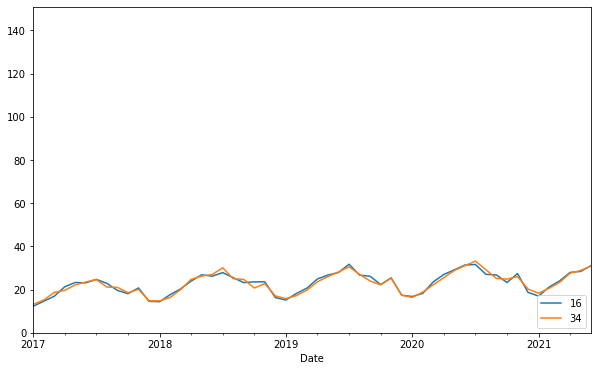

In [115]:
for i in final_groups[1]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

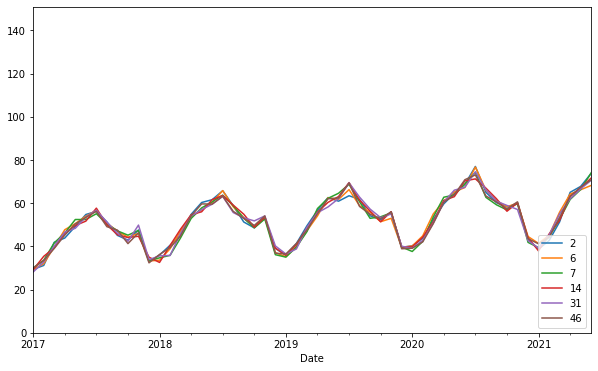

In [116]:
for i in final_groups[2]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

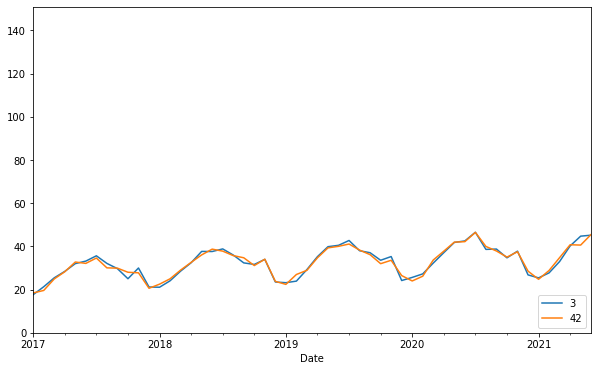

In [117]:
for i in final_groups[3]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

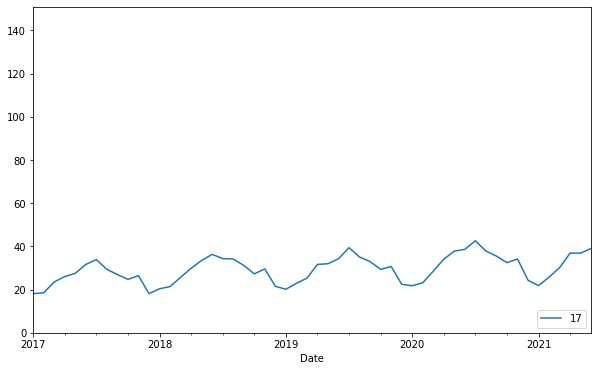

In [118]:
for i in final_groups[4]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

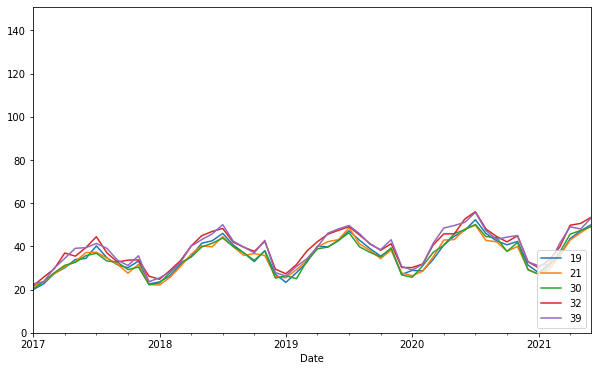

In [119]:
for i in final_groups[5]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

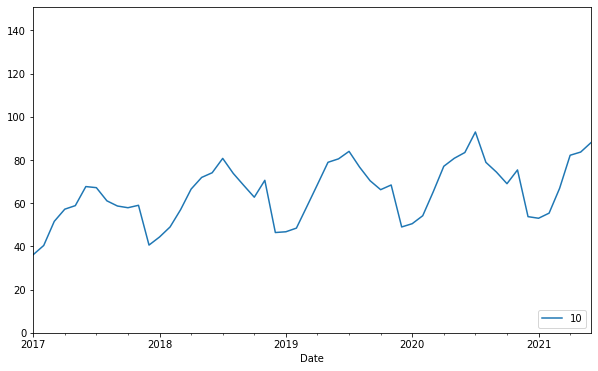

In [120]:
for i in final_groups[6]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

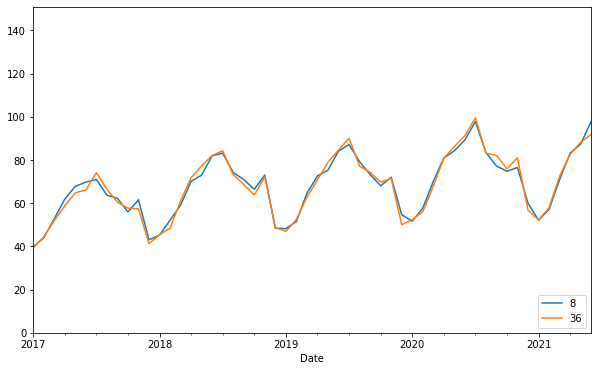

In [121]:
for i in final_groups[7]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

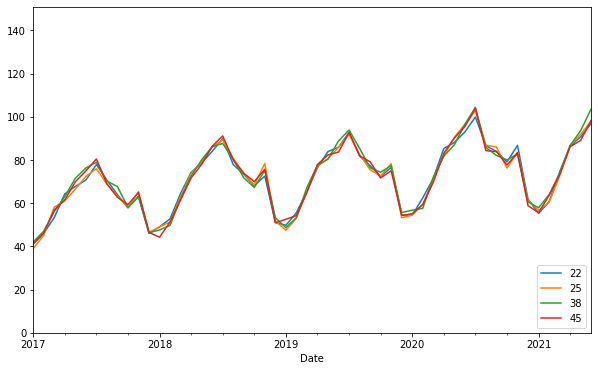

In [122]:
for i in final_groups[8]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

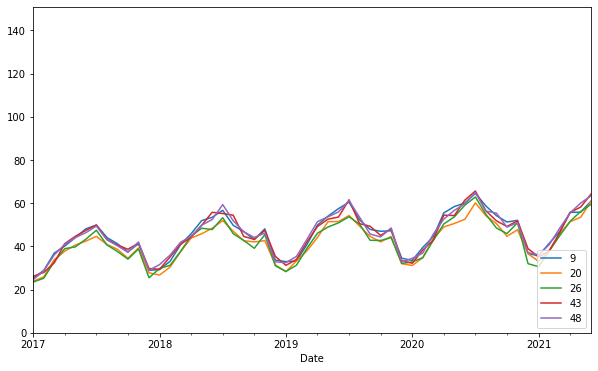

In [123]:
for i in final_groups[9]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

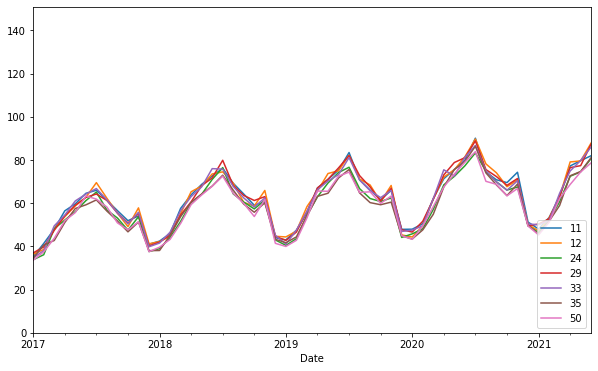

In [124]:
for i in final_groups[10]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

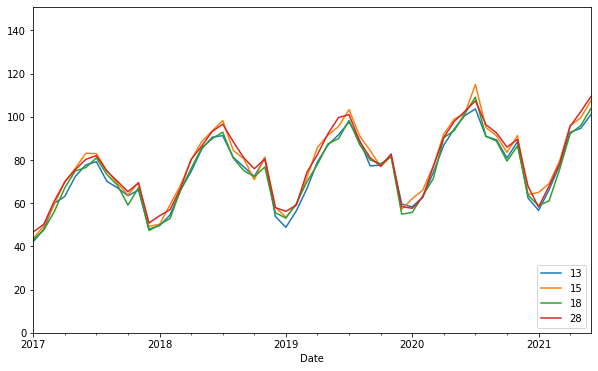

In [125]:
for i in final_groups[11]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

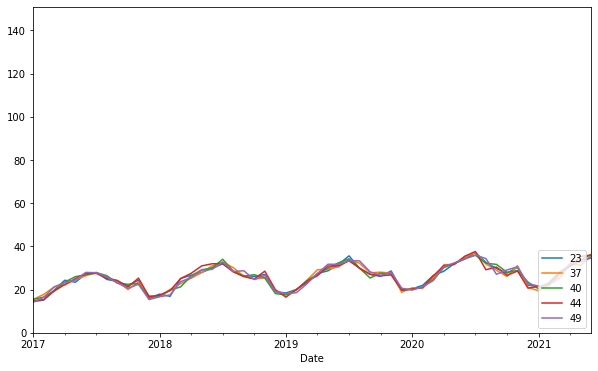

In [126]:
for i in final_groups[12]:
    dfs[i]["KMart"]["df"].Sales.resample('MS').mean().plot(label=i)
    plt.ylim(0,151)
    plt.legend(loc="lower right")

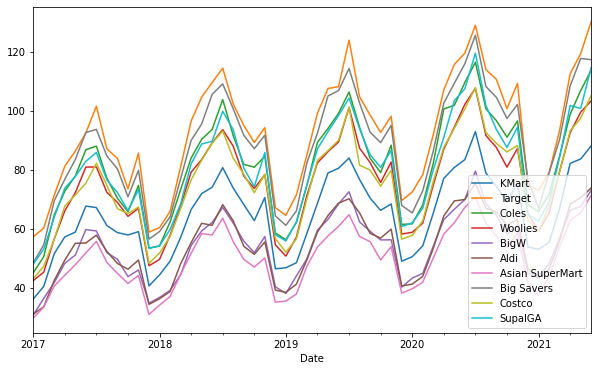

In [127]:
for store in train.Store.unique():
    dfs[10][store]["df"].Sales.resample('MS').mean().plot(label=store)
    plt.legend(loc="lower right")

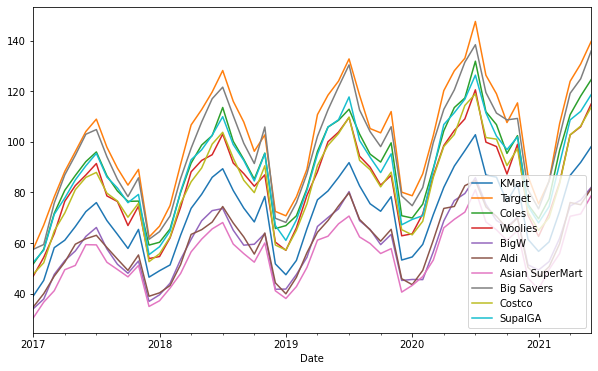

In [128]:
for store in train.Store.unique():
    dfs[25][store]["df"].Sales.resample('MS').mean().plot(label=store)
    plt.legend(loc="lower right")

In [129]:
# store groups
stores0 = ["Target", "Big Savers"]
stores1 = ["KMart"]
stores2 = ["BigW", "Aldi", "Asian SuperMart"]
stores3 = ["SupalGA", "Coles", "Woolies", "Costco"]

In [139]:
store_group = {
    "Target": "stores0",
    "Big Savers": "stores0",
    "KMart": "stores1",
    "BigW": "stores2",
    "Aldi": "stores2",
    "Asian SuperMart": "stores2",
    "SupaIGA": "stores3",
    "Coles": "stores3",
    "Woolies": "stores3",
    "Costco": "stores3",
}

In [131]:
final_groups_s = [stores0, stores1, stores2, stores3]

In [132]:
out_df = pd.DataFrame(index=dfs[2]["KMart"]["df"].index)
for ig, item_g in enumerate(final_groups):
    for jg, store_g in enumerate(final_groups_s):
        x = train[(train['Store'].isin(store_g)) & (train['Item'].isin(item_g))].groupby(['Date'])
        out_df[f"items{ig} stores{jg}"] = x["Sales"].mean()

out_df

,items0 stores0,items0 stores1,items0 stores2,items0 stores3,items1 stores0,items1 stores1,items1 stores2,items1 stores3,items2 stores0,items2 stores1,...,items10 stores2,items10 stores3,items11 stores0,items11 stores1,items11 stores2,items11 stores3,items12 stores0,items12 stores1,items12 stores2,items12 stores3
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,13.750000,11.833333,7.722222,11.666667,15.75,18.5,9.500000,16.833333,37.833333,28.500000,...,26.095238,37.714286,53.125,41.50,34.250000,47.500000,17.4,17.4,13.133333,16.333333
2017-01-02,14.333333,11.333333,7.777778,12.000000,16.75,8.5,10.166667,12.666667,39.916667,31.000000,...,24.428571,38.809524,57.500,38.50,31.333333,46.416667,22.2,14.0,11.933333,16.400000
2017-01-03,14.500000,8.666667,8.833333,12.111111,20.50,13.5,12.666667,14.500000,42.166667,27.333333,...,26.476190,39.047619,56.500,48.50,37.166667,53.750000,21.5,11.4,11.000000,18.600000
2017-01-04,15.000000,13.500000,8.500000,15.611111,17.00,14.0,11.166667,16.333333,46.666667,27.666667,...,30.333333,41.666667,60.875,45.00,39.416667,56.750000,23.5,19.2,11.733333,19.933333
2017-01-05,15.500000,11.333333,9.611111,15.055556,18.00,18.5,11.000000,14.333333,46.166667,32.333333,...,31.666667,46.904762,75.000,49.25,38.833333,57.666667,21.9,19.8,14.600000,20.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,27.750000,23.333333,16.666667,26.277778,36.50,21.0,19.333333,34.500000,77.500000,56.000000,...,53.428571,76.666667,107.875,90.00,66.750000,101.083333,38.3,32.0,23.600000,32.000000
2021-06-27,33.500000,26.000000,19.944444,29.166667,37.00,31.5,21.500000,32.666667,89.000000,61.333333,...,67.000000,93.761905,143.125,101.00,83.666667,116.916667,46.9,32.2,26.000000,40.266667
2021-06-28,33.166667,26.000000,21.166667,31.888889,45.25,32.5,24.333333,38.333333,90.833333,69.000000,...,61.761905,90.095238,132.625,91.25,77.416667,121.416667,42.3,31.6,25.800000,40.466667


In [133]:
import statsmodels.api as sm
import itertools
import math

out_dict = {}

for i in list(out_df.columns):
    
    resample = out_df[i].resample('MS').mean()
    model = sm.tsa.statespace.SARIMAX(resample,
                            order=(0,1,1),
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
    results = model.fit()
    out_dict[i] = results
    

C:\Users\Ayden\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ayden\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ayden\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ayden\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [140]:
output_dict = {"id": [], "sales": []}

for index, row in test.iterrows():
    output_dict["id"].append(index + 1)
    cstores_group = store_group[row.Store]
    citems_group = item_group[row.Item]
    output_dict["sales"].append(out_dict[f'{citems_group} {cstores_group}'].get_prediction(start=row.Date).predicted_mean[0])

output_dict


{'id': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  1

In [142]:
out_df = pd.DataFrame(data=output_dict)
out_df.to_csv("submissions.csv")

In [136]:
out_dict['items0 stores1'].get_prediction(start='2017-01-05').predicted_mean[0]

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'